In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re
import time
from scripts import *
import scipy.linalg as la

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split as tts, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score, precision_recall_curve, roc_curve

from plotMatriz import plotMatriz

In [2]:
stemmed_data_path = 'Dados/stemsnowball.p'

### Abrir Stem dados do imdb.p

In [3]:
D    = pickle.load(open(stemmed_data_path, 'rb'))
Docs = D['Docs']
y   = D['y']

## Caso Bin

In [4]:
yB = y.copy()
yB[yB < 5] = 0
yB[yB > 6] = 1  

### Divisao dos dados em treino e teste

In [5]:
Docs1_b, Docs2_b, y1_b, y2_b     = tts(Docs, yB, test_size=1/4, stratify=yB,random_state=42) #total ---> treino + teste
Docs1t_b, Docs1v_b, y1t_b, y1v_b = tts(Docs1_b, y1_b, test_size=1/3, stratify=y1_b,random_state=42)  #treino ---> treino + validacao 

### Testar hyper parametros de "n_neighbors" e "weights"

In [6]:
final_tfidf_bin = 'tfidf/tfidf_binario.p'

In [7]:
tfidf_b = pickle.load(open(final_tfidf_bin, 'rb'))['tfidf']
X1t_b, X1v_b = tfidf_b.transform(Docs1t_b), tfidf_b.transform(Docs1v_b)

ks_b = np.arange(21, 61, 4)
ws_b = ['uniform', 'distance']

combinacoes_k_w_b     = [(w, k) for w in ws_b for k in ks_b]
resultados_k_w_b = []
    
for w, k in combinacoes_k_w_b:
    print('Pars ---> ', k, w)
    knn_b = KNeighborsClassifier(n_neighbors=k, weights=w).fit(X1t_b, y1t_b)
    resultados_k_w_b.append(knn_b.score(X1v_b, y1v_b)*100)

Pars --->  21 uniform
Pars --->  25 uniform
Pars --->  29 uniform
Pars --->  33 uniform
Pars --->  37 uniform
Pars --->  41 uniform
Pars --->  45 uniform
Pars --->  49 uniform
Pars --->  53 uniform
Pars --->  57 uniform
Pars --->  21 distance
Pars --->  25 distance
Pars --->  29 distance
Pars --->  33 distance
Pars --->  37 distance
Pars --->  41 distance
Pars --->  45 distance
Pars --->  49 distance
Pars --->  53 distance
Pars --->  57 distance


In [8]:
knn_k_w_bin = 'Resultados/knn_k_w_bin.p'

In [9]:
dict_results_bin = {'parametros' : combinacoes_k_w_b, 
                    'scores'   : resultados_k_w_b
                   }

pickle.dump(dict_results_bin, open(knn_k_w_bin, 'wb'))

In [10]:
best_k_w = pickle.load(open(knn_k_w_bin, 'rb'))

combinacoes_k_w_b = best_k_w["parametros"]

resultados_k_w_b = best_k_w["scores"]

In [11]:
def annot_max(x,y,z,ax=None):
    xmax = x[np.argmax(y)]
    ymax = np.max(y)
    zmax = z[np.argmax(y)]
    text= "n_neighbors= " + str(zmax[1]) + " weights= " + zmax[0]
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)


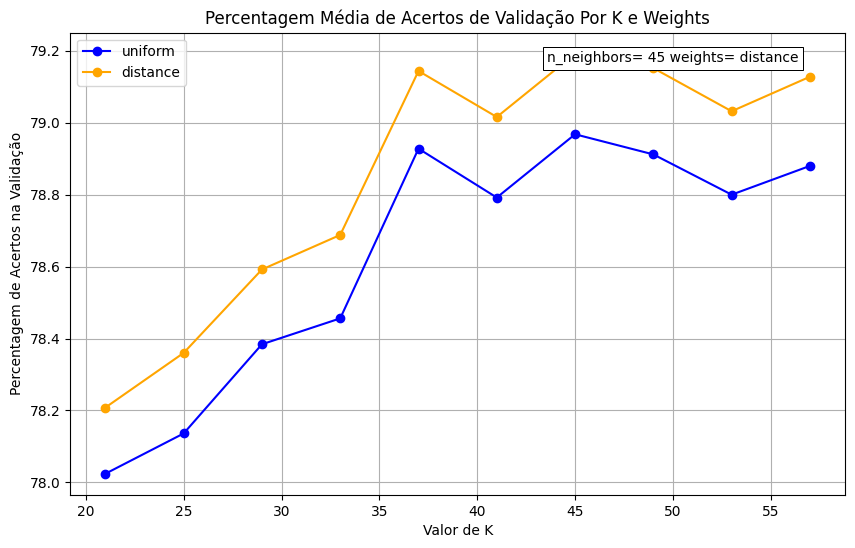

In [12]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(21, 61, 4), resultados_k_w_b[0:10],  '-o', color='blue')
plt.plot(np.arange(21, 61, 4), resultados_k_w_b[10:20], '-o', color='orange')
annot_max(np.arange(21, 61, 4),resultados_k_w_b[10:20], combinacoes_k_w_b[10:20])
plt.title('Percentagem Média de Acertos de Validação Por K e Weights')
plt.xlabel('Valor de K')
plt.ylabel('Percentagem de Acertos na Validação')
plt.legend(('uniform', 'distance'))
plt.grid()    

### Melhores Valores

In [13]:
# Vetorização
tfidf_b = pickle.load(open(final_tfidf_bin, 'rb'))['tfidf']
X1t_b, X1v_b, X2_b = tfidf_b.transform(Docs1t_b), tfidf_b.transform(Docs1v_b), tfidf_b.transform(Docs2_b)

# Regressão Logistica
knn_b = KNeighborsClassifier(n_neighbors=45, weights='distance').fit(X1t_b, y1t_b)

# Resultados
print('Tamanho Vocabulário:', len(tfidf_b.get_feature_names()))
print('Score Treino:', knn_b.score(X1t_b, y1t_b)*100)
print('Score Validação:', knn_b.score(X1v_b, y1v_b)*100)
print('Score Teste:', knn_b.score(X2_b, y2_b)*100)

knn_model_bin = 'Modelos/knn_model_bin.p'
pickle.dump({'knn' : knn_b}, open(knn_model_bin, 'wb'))

C:\Users\amvlf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Tamanho Vocabulário: 143323
Score Treino: 100.0
Score Validação: 79.192
Score Teste: 78.792


Número de Erros Teste:  2651
Matriz de Confusão Teste:



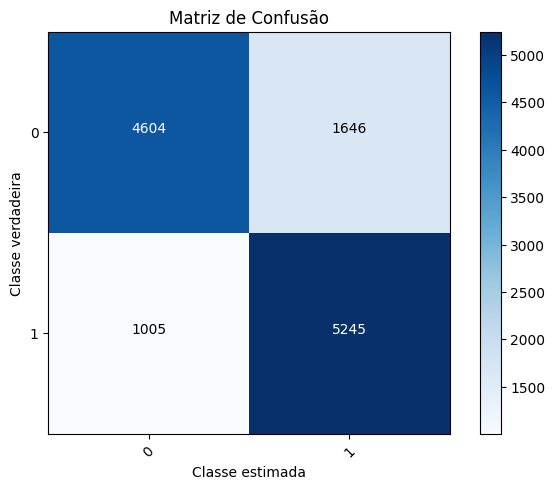

In [14]:
#Matriz Confusão Dados de Teste
print('Número de Erros Teste: ', np.sum(y2_b != knn_b.predict(X2_b)))
MC = confusion_matrix(y2_b, knn_b.predict(X2_b))
print('Matriz de Confusão Teste:')
plotMatriz(MC)
print()

Número de Erros Validação:  2601
Matriz de Confusão Validação:


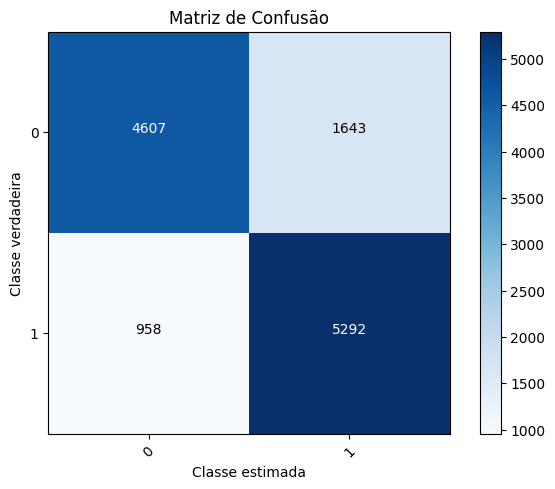

In [15]:
#Matriz de Confusão Dados de Validação
print('Número de Erros Validação: ', np.sum(y1v_b != knn_b.predict(X1v_b)))
MCV = confusion_matrix(y1v_b, knn_b.predict(X1v_b))
print('Matriz de Confusão Validação:')
plotMatriz(MCV)

### Resultados

In [16]:
D = pickle.load(open(stemmed_data_path, 'rb'))

Docs_test_bin_knn, target_test_bin_knn = D['Docs'][:1000], D['y'][:1000]

X_test_bin_knn  = text2vector(Docs_test_bin_knn, 'b', final_tfidf_bin)
ye_test_bin_knn = binClassify(X_test_bin_knn, 'knn', False, knn_model_bin)


y_test_bin_knn = target_test_bin_knn.copy()
y_test_bin_knn[y_test_bin_knn < 5] = 0
y_test_bin_knn[y_test_bin_knn > 6] = 1

MC  = confusion_matrix(y_test_bin_knn, ye_test_bin_knn)

print('Matriz de Confusão Teste:')
print(MC)
print('\nNúmero de Erros: ', np.sum(y_test_bin_knn != ye_test_bin_knn))

Matriz de Confusão Teste:
[[424  74]
 [ 38 464]]

Número de Erros:  112


## Caso Multi

In [17]:
yM = y.copy()

### Divisao em treino e teste

In [18]:
Docs1_m, Docs2_m, y1_m, y2_m     = tts(Docs, yM, test_size=1/4, stratify=yM,random_state=42) #total ---> treino + teste
Docs1t_m, Docs1v_m, y1t_m, y1v_m = tts(Docs1_m, y1_m, test_size=1/3, stratify=y1_m,random_state=42)  #treino ---> treino + validacao 

### Testar hyper parametros de "n_neighbors" e "weights"

In [19]:
final_tfidf_multi = 'tfidf/tfidf_multiclasse.p'

In [20]:
tfidf_m = pickle.load(open(final_tfidf_multi, 'rb'))['tfidf']
X1t_m, X1v_m = tfidf_m.transform(Docs1t_m), tfidf_m.transform(Docs1v_m)

ks_m = np.arange(21, 61, 4)
ws_m = ['uniform', 'distance']

combinacoes_k_w_m     = [(w, k) for w in ws_m for k in ks_m]
resultados_k_w_m = []
for w, k in combinacoes_k_w_m:
    print('Pars ---> ', k, w)
    knn_m = KNeighborsClassifier(n_neighbors=k, weights=w).fit(X1t_m, y1t_m)
    resultados_k_w_m.append(knn_m.score(X1v_m, y1v_m)*100)

Pars --->  21 uniform
Pars --->  25 uniform
Pars --->  29 uniform
Pars --->  33 uniform
Pars --->  37 uniform
Pars --->  41 uniform
Pars --->  45 uniform
Pars --->  49 uniform
Pars --->  53 uniform
Pars --->  57 uniform
Pars --->  21 distance
Pars --->  25 distance
Pars --->  29 distance
Pars --->  33 distance
Pars --->  37 distance
Pars --->  41 distance
Pars --->  45 distance
Pars --->  49 distance
Pars --->  53 distance
Pars --->  57 distance


In [21]:
knn_k_w_multi = 'Resultados/knn_k_w_multi.p'

In [22]:
dict_results_multi = {'parametros' : combinacoes_k_w_b, 
                    'scores'   : resultados_k_w_b
                   }

pickle.dump(dict_results_multi, open(knn_k_w_multi, 'wb'))

In [23]:
best_k_w = pickle.load(open(knn_k_w_multi, 'rb'))

combinacoes_k_w_b = best_k_w["parametros"]

resultados_k_w_b = best_k_w["scores"]

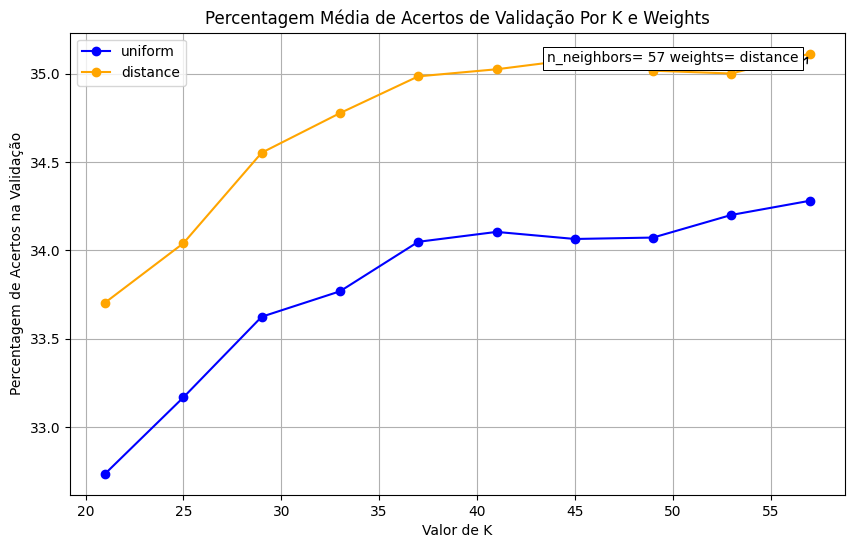

In [24]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(21, 61, 4), resultados_k_w_m[0:10],  '-o', color='blue')
plt.plot(np.arange(21, 61, 4), resultados_k_w_m[10:20], '-o', color='orange')
annot_max(np.arange(21, 61, 4), resultados_k_w_m[10:20],combinacoes_k_w_b[10:20])
plt.title('Percentagem Média de Acertos de Validação Por K e Weights')
plt.xlabel('Valor de K')
plt.ylabel('Percentagem de Acertos na Validação')
plt.legend(('uniform', 'distance'))
plt.grid()    

### Melhores valores

In [25]:
# Vetorização
tfidf_m = pickle.load(open(final_tfidf_multi, 'rb'))['tfidf']
X1t_m, X1v_m, X2_m = tfidf_m.transform(Docs1t_m), tfidf_m.transform(Docs1v_m), tfidf_m.transform(Docs2_m)

# Regressão Logistica
knn_m = KNeighborsClassifier(n_neighbors=57, weights='distance').fit(X1t_m, y1t_m)

knn_model_multi = 'Modelos/knn_model_multi.p'
pickle.dump({'knn' : knn_m}, open(knn_model_multi, 'wb'))

In [26]:
print('Tamanho Vocabulário:', len(tfidf_m.get_feature_names_out()))
print('Score Treino:', knn_m.score(X1t_m, y1t_m)*100)
print('Score Validação:', knn_m.score(X1v_m, y1v_m)*100)
print('Score Teste:', knn_m.score(X2_m, y2_m)*100)

Tamanho Vocabulário: 128551
Score Treino: 99.988
Score Validação: 35.112
Score Teste: 35.128


Número de Erros Teste:  8109
Matriz de Confusão Teste:



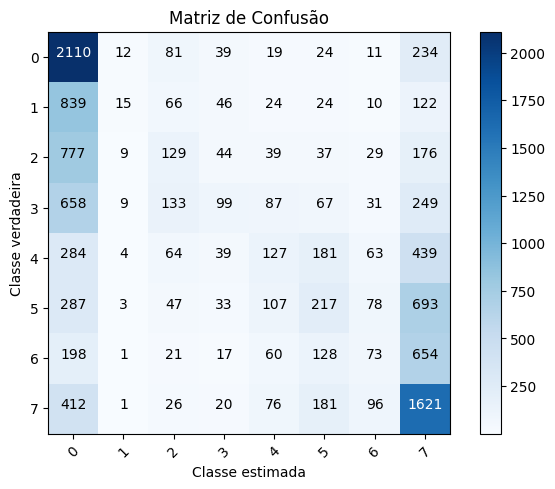

In [27]:
#Matriz Confusão Dados de Teste
print('Número de Erros Teste: ', np.sum(y2_m != knn_m.predict(X2_m)))
MC = confusion_matrix(y2_m, knn_m.predict(X2_m))
print('Matriz de Confusão Teste:')
plotMatriz(MC)
print()

Número de Erros Validação:  8111
Matriz de Confusão Validação:


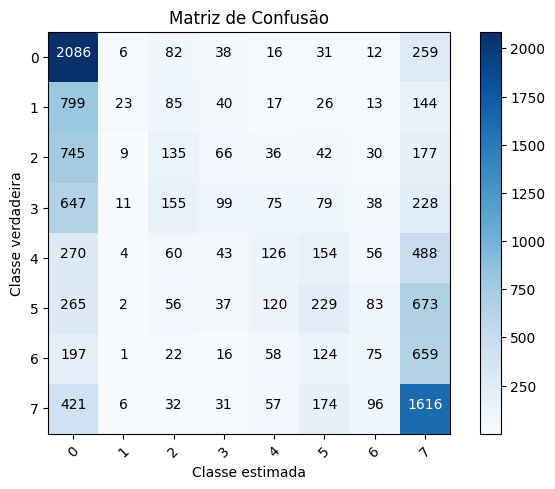

In [28]:
#Matriz de Confusão Dados de Validação
print('Número de Erros Validação: ', np.sum(y1v_m != knn_m.predict(X1v_m)))
MCV = confusion_matrix(y1v_m, knn_m.predict(X1v_m))
print('Matriz de Confusão Validação:')
plotMatriz(MCV)

In [29]:
D = pickle.load(open(stemmed_data_path, 'rb'))

Docs_test_mult_knn, y_test_mult_knn = D['Docs'], D['y']

X_test_mult_knn  = text2vector(Docs_test_mult_knn, 'm', final_tfidf_multi)
ye_test_mult_knn = multiClassify(X_test_mult_knn, 'knn', False, knn_model_multi)


MC  = confusion_matrix(y_test_mult_knn, ye_test_mult_knn)

print('Matriz de Confusão Teste:')
print(MC)
print('\nNúmero de Erros: ', np.sum(y_test_mult_knn != ye_test_mult_knn))
print('Percentagem de acertos: %.2f'%(((y.shape[0]-np.sum(y_test_mult_knn != ye_test_mult_knn))/y.shape[0])*100))

Matriz de Confusão Teste:
[[9258   18  163   77   35   55   23  493]
 [1638 2331  151   86   41   50   23  266]
 [1522   18 2745  110   75   79   59  353]
 [1305   20  289 2863  162  146   69  477]
 [ 554    8  124   82 2654  335  119  927]
 [ 552    5  103   70  228 3374  161 1366]
 [ 395    2   43   33  118  252 2451 1313]
 [ 833    7   58   51  134  355  192 8101]]

Número de Erros:  16223
Percentagem de acertos: 67.55
